<a href="https://colab.research.google.com/github/balladembelemoussa/codesandbox-template-nuxt/blob/main/Copie_de_Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Apprentissage automatique - Recherche de grille**

Recherche de grille
La majorité des modèles d'apprentissage automatique contiennent des paramètres qui peuvent être ajustés pour faire varier la façon dont le modèle apprend. Par exemple, le modèle de régression logistique, de sklearn, a un paramètre Cqui contrôle la régularisation, ce qui affecte la complexité du modèle.

Comment choisissons-nous le meilleur rapport qualité-prix pour C? La meilleure valeur dépend des données utilisées pour entraîner le modèle.

Comment ça marche?
Une méthode consiste à essayer différentes valeurs, puis à choisir la valeur qui donne le meilleur score. Cette technique est connue sous le nom de recherche par grille . Si nous devions sélectionner les valeurs de deux paramètres ou plus, nous évaluerions toutes les combinaisons des ensembles de valeurs, formant ainsi une grille de valeurs.

Avant d'entrer dans l'exemple, il est bon de savoir ce que fait le paramètre que nous modifions. Des valeurs plus élevées Cindiquent au modèle que les données d'entraînement ressemblent aux informations du monde réel, accordent un plus grand poids aux données d'entraînement. Tandis que des valeurs inférieures de Cfont le contraire.

Utilisation des paramètres par défaut
Voyons d'abord quel type de résultats nous pouvons générer sans une recherche de grille en utilisant uniquement les paramètres de base.

Pour commencer, nous devons d'abord charger le jeu de données avec lequel nous allons travailler.

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

Ensuite, pour créer le modèle, nous devons disposer d'un ensemble de variables indépendantes X et d'une variable dépendante y.

In [2]:
X = iris['data']
y = iris['target']

Nous allons maintenant charger le modèle logistique pour classer les fleurs d'iris.

In [3]:
from sklearn.linear_model import LogisticRegression

Création du modèle, définition de max_iter sur une valeur plus élevée pour s'assurer que le modèle trouve un résultat.

Gardez à l'esprit que la valeur par défaut pour Cdans un modèle de régression logistique est 1, nous comparerons cela plus tard.

Dans l'exemple ci-dessous, nous examinons l'ensemble de données de l'iris et essayons de former un modèle avec des valeurs variables pour Cla régression logistique.

In [4]:
logit = LogisticRegression(max_iter = 10000)

Après avoir créé le modèle, nous devons ajuster le modèle aux données.

In [5]:
print(logit.fit(X,y))

LogisticRegression(max_iter=10000)


Pour évaluer le modèle, nous exécutons la méthode de score.

In [6]:
print(logit.score(X,y))

0.9733333333333334


Exemple

In [8]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter = 10000)

print(logit.fit(X,y))

print(logit.score(X,y))

LogisticRegression(max_iter=10000)
0.9733333333333334


vec le réglage par défaut de C = 1, nous avons obtenu un score de 0.973.

Voyons si nous pouvons faire mieux en implémentant une recherche par grille avec des valeurs de différence de 0,973.

Implémentation de la recherche de grille
Nous suivrons les mêmes étapes qu'auparavant, sauf que cette fois nous définirons une plage de valeurs pour C.

Savoir quelles valeurs définir pour les paramètres recherchés nécessitera une combinaison de connaissances du domaine et de pratique.

Étant donné que la valeur par défaut pour Cest 1, nous allons définir une plage de valeurs qui l'entoure.

In [9]:
C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

Ensuite, nous allons créer une boucle for pour modifier les valeurs de Cet évaluer le modèle à chaque modification.

Nous allons d'abord créer une liste vide pour y stocker le score

In [10]:
scores = []

Pour changer les valeurs de Cnous devons boucler sur la plage de valeurs et mettre à jour le paramètre à chaque fois.

In [11]:
for choice in C:
  logit.set_params(C=choice)
  logit.fit(X, y)
  scores.append(logit.score(X, y))

Avec les scores stockés dans une liste, nous pouvons évaluer quel Cest le meilleur choix.

In [12]:
print(scores)

[0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667]


**Exemple**

In [13]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter = 10000)

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in C:
  logit.set_params(C=choice)
  logit.fit(X, y)
  scores.append(logit.score(X, y))

print(scores)


[0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667]


Résultats expliqués
Nous pouvons voir que les valeurs inférieures de Cs'exécutent moins bien que le paramètre de base de 1. Cependant, à mesure que nous augmentons la valeur de C, 1.75le modèle a connu une précision accrue.

Il semble que l'augmentation Cau-delà de ce montant n'aide pas à augmenter la précision du modèle.

Remarque sur les meilleures pratiques
Nous avons noté notre modèle de régression logistique en utilisant les mêmes données que celles utilisées pour l'entraîner. Si le modèle correspond trop étroitement à ces données, il peut ne pas être efficace pour prédire des données invisibles. Cette erreur statistique est connue sous le nom de sur-ajustement .

Pour éviter d'être induit en erreur par les scores sur les données d'apprentissage, nous pouvons mettre de côté une partie de nos données et l'utiliser spécifiquement dans le but de tester le modèle. Reportez-vous au cours sur le fractionnement train/test pour éviter d'être induit en erreur et de sur-adapter.

**Prétraitement - Données catégorielles**

Données catégorielles
Lorsque vos données comportent des catégories représentées par des chaînes, il sera difficile de les utiliser pour former des modèles d'apprentissage automatique qui n'acceptent souvent que des données numériques.

Au lieu d'ignorer les données catégorielles et d'exclure les informations de notre modèle, vous pouvez transformer les données afin qu'elles puissent être utilisées dans vos modèles.

Jetez un œil au tableau ci-dessous, il s'agit du même ensemble de données que nous avons utilisé dans le chapitre sur la régression multiple .

Exemple

**Résultat**

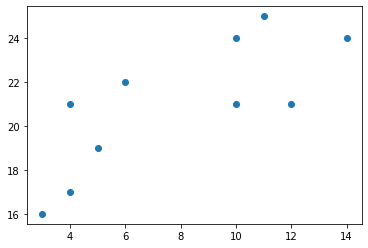

In [16]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()